In [ ]:
import keras
import tensorflow as tf
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
financial_data = pd.read_csv("financial_data.csv")

financial_data.sample(10)

,Sentence,Sentiment
2239,Preparing for a Breakout Trade in Netflix $NFL...,positive
2236,"In Finland , snow storms brought trees down on...",negative
4424,"$QCOM chart: Qualcomm Short 61.8% Retracement,...",negative
2688,Novartis buys remaining rights to GSK treatmen...,positive
4374,long $AAPL 107 calls @ .40,positive
4456,i-Grid shows $DIA capped for the long term at ...,negative
4283,Pretax profit decreased to EUR 33.8 mn from EU...,neutral
1018,credit 20 November 2009 - Finnish glass techno...,positive
4105,The companies signed the letter of intent for ...,neutral
3940,Pretax profit jumped to EUR 21.9 million from ...,positive


In [3]:
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5841 entries, 0 to 5840
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5841 non-null   object
 1   Sentiment  5841 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [4]:
financial_data.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [5]:
financial_data["Sentiment"].value_counts()

Sentiment
neutral     3130
positive    1851
negative     860
Name: count, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

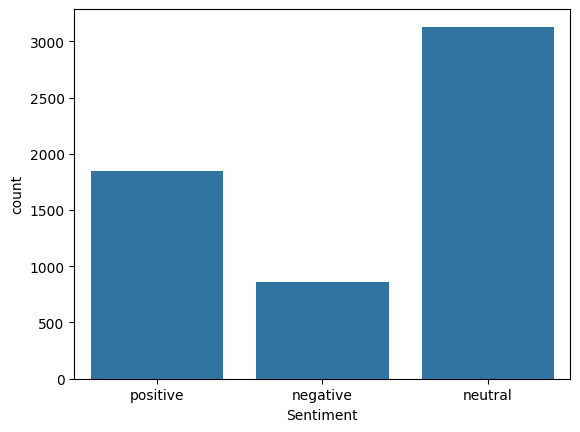

In [23]:
import seaborn as sns
sns.countplot(data = financial_data, x = "Sentiment")

In [24]:
financial_data["WordCount"] = financial_data["Sentence"].apply(lambda x: len(str(x).split(" ")))

financial_data[["Sentence", "WordCount"]].sample(5)

,Sentence,WordCount
976,Viking Line has canceled some services .,7
750,Russian officials inspected the damage and gav...,38
3936,"`` Soon after , the collisions started . ''",9
4126,Satama 's net sales would be higher than the y...,12
4213,The other actions include the cutting of the e...,26


In [25]:
financial_data.groupby("Sentiment")["WordCount"].mean()

Sentiment
negative    19.324419
neutral     22.146006
positive    19.954619
Name: WordCount, dtype: float64

In [26]:
financial_data.groupby("Sentiment")["WordCount"].median()

Sentiment
negative    17.0
neutral     21.0
positive    18.0
Name: WordCount, dtype: float64

<Axes: xlabel='WordCount', ylabel='Count'>

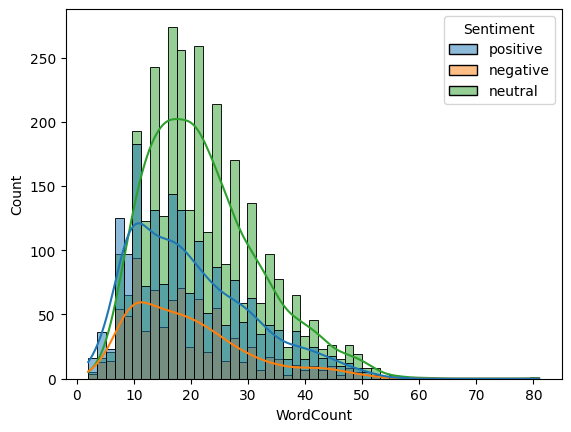

In [27]:
sns.histplot(data = financial_data, x = "WordCount", hue = "Sentiment", kde = True)

<Axes: ylabel='WordCount'>

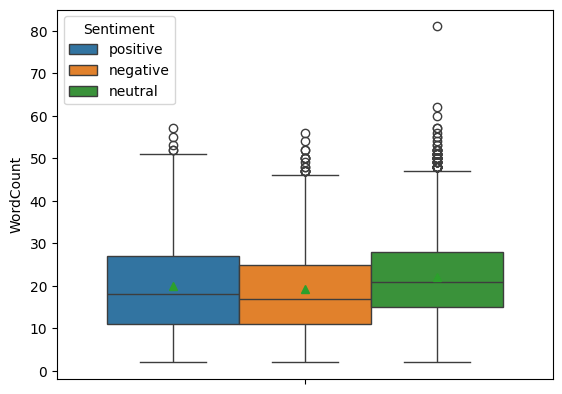

In [28]:
sns.boxplot(data = financial_data, y = "WordCount", hue = "Sentiment", showmeans = True)

In [29]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [32]:
import string

def preprocess_data(input_data):

    lowercase = tf.strings.lower(input_data)

    stripped_urls = tf.strings.regex_replace(lowercase, r"https?://\S+|www\.\S+", "")

    stripped_symbls = tf.strings.regex_replace(stripped_urls, r"\S*@\S*\s?", "")

    stripped_brckts = tf.strings.regex_replace(stripped_symbls, r"<.*?>+|\[|\]", "")

    stripped_dgts = tf.strings.regex_replace(stripped_brckts, r"\w*\d\w*", "")

    stripped_spcs = tf.strings.regex_replace(stripped_dgts, r"\s+", " ")

    stripped_stpwrds = tf.strings.regex_replace(stripped_spcs, r"\b(?:{})\b".format("|".join(stop_words)), "")

    final_data = tf.strings.regex_replace(stripped_stpwrds ,r"[^a-zA-Z\s]+" ,"")
    
    return final_data

In [33]:
financial_data["NormalizedSentence"] = financial_data["Sentence"].apply(lambda x: preprocess_data(x).numpy().decode("utf-8"))

financial_data

,Sentence,Sentiment,WordCount,NormalizedSentence
0,The GeoSolutions technology will leverage Bene...,positive,32,geosolutions technology leverage benefon gp...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,11,esi lows bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,39,last quarter componenta net sales doubled...
3,According to the Finnish-Russian Chamber of Co...,neutral,20,according finnishrussian chamber commerce ...
4,The Swedish buyout firm has sold its remaining...,neutral,23,swedish buyout firm sold remaining percent...
...,...,...,...,...
5836,RISING costs have forced packaging producer Hu...,negative,17,rising costs forced packaging producer huhtam...
5837,Nordic Walking was first used as a summer trai...,neutral,14,nordic walking first used summer training m...
5838,"According shipping company Viking Line , the E...",neutral,16,according shipping company viking line eu de...
5839,"In the building and home improvement trade , s...",neutral,18,building home improvement trade sales decr...
